In [1]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import json


with open("credentials.json") as infile:
        auth = json.load(infile)
        client_id = auth["client_id"]
        client_secret = auth["client_secret"]

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
energy = []
instrumentalness = []
key = []
tempo = []
time_sig = []
valence = [] # How happy a song is??? SO COOL
dancebility = []
acousticness = []
artists_and_tracks = []
year = []

In [2]:
count = 0
stupid_tracks = 0
iterations = 0
curr_year = 2017
for j in range(1):
    curr_year += 1
    year_string = str(curr_year)
    for i in range(0,100,50):
        track_results = spotify.search(q='genre:pop tag:hipster'.format(year_string), type='track', limit=50,offset=i)
        for i, t in enumerate(track_results['tracks']['items']):
            f = spotify.audio_features(t['id'])
            f = f[0] # this does not work with live recordings
            artists_id = t['artists'][0]['id']
            track_names = t['name']
            artist_and_track = artists_id + track_names # made an attribute that adds the id and track name together
            if f and (t['popularity'] > 0) and (artist_and_track not in artists_and_tracks) and (t["album"]["artists"][0]["name"] != "Various Artists"): # checks if popularity is greater than 0 and if the song is already in the dataset
                year.append(curr_year)
                artist_name.append(t['artists'][0]['name'])
                artist_id.append(t['artists'][0]['id'])
                track_name.append(t['name'])
                track_id.append(t['id'])
                track_popularity.append(t['popularity'])
                energy.append(f['energy'])
                instrumentalness.append(f["instrumentalness"])
                key.append(f["key"])
                tempo.append(f["tempo"])
                time_sig.append(f["time_signature"])
                valence.append(f["valence"])
                dancebility.append(f["danceability"])
                acousticness.append(f["acousticness"])
                artists_and_tracks.append(artist_and_track)
            else:
                stupid_tracks+= 1
        iterations += 1
        
        

track_df = pd.DataFrame({'artist_name' : artist_name, 'year': year, 'track_name' : track_name, 'track_id' : track_id, 
                         'popularity' : track_popularity, 'artist_id' : artist_id,
                         'energy': energy, 'instrumentalness': instrumentalness,
                         'key': key, 'tempo': tempo, 'time_sig': time_sig, 'valence': valence,
                         'danceability': dancebility, 'acousticness': acousticness})

(array([ 1.,  0.,  1.,  0.,  0.,  2.,  0., 74.,  0.,  4.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

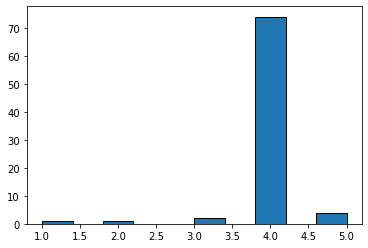

In [4]:
import matplotlib.pyplot as plt

plt.hist(track_df["popularity"], bins=10, edgecolor = "black")

In [6]:
track_df.head(20)

,artist_name,year,track_name,track_id,popularity,artist_id,energy,instrumentalness,key,tempo,time_sig,valence,danceability,acousticness
0,Ambar Gurung,2018,Pokhiyera Ghamko Jhulko,33iZJIPYbNjZguZrOLHMqr,3,0BnoiM90iHXejl1DmYjSOi,0.513,0.000002,7,158.244,3,0.692,0.416,0.78700
1,Ambar Gurung,2018,Geetle Bolai,7BObE3c6Fo1MZTo5PvmZZ9,2,0BnoiM90iHXejl1DmYjSOi,0.279,0.001010,11,143.747,3,0.582,0.358,0.94600
2,Ambar Gurung,2018,Mero Aankhalai Rakhane,442X2kKLcOfAK84wqvMdbE,1,0BnoiM90iHXejl1DmYjSOi,0.748,0.000000,5,134.052,3,0.843,0.440,0.42300
3,Ambar Gurung,2018,Aaja Bholi Dhukhdaina,6kjgbUM6204xAgL7iPd1qy,3,0BnoiM90iHXejl1DmYjSOi,0.269,0.003490,3,122.445,3,0.617,0.418,0.93000
4,Charli XCX,2018,You (Ha Ha Ha) - BURNS' Violet Cloud Version [...,6tYknrEm6MyIcdDt9y75IY,4,25uiPmTg16RbhZWAqwLBy5,0.833,0.001560,8,89.973,4,0.432,0.493,0.00159
5,Charli XCX,2018,You (Ha Ha Ha) - MS MR Remix,3NwQRZC7uXnojaUM0eLcSd,4,25uiPmTg16RbhZWAqwLBy5,0.588,0.000031,11,90.117,4,0.346,0.567,0.19300
6,Carly Rae Jepsen,2018,Your Heart Is A Muscle,6cqskliC7oJNeSRk1WgMwH,4,6sFIWsNpZYqfjUpaCgueju,0.693,0.000024,4,171.970,4,0.328,0.535,0.17200
7,The Script,2018,Freedom Child,1mKhGcEs2oeIEqRmmj8oIY,4,3AQRLZ9PuTAozP28Skbq8V,0.681,0.014800,6,131.973,4,0.679,0.691,0.00210
8,David Bisbal,2018,Esclavo De Sus Besos - Urban Remix,6uu1vWFZFO42WhdQjnFlUt,4,5gOJTI4TusSENizxhcG7jB,0.944,0.000000,2,119.988,4,0.627,0.788,0.00445
9,Jessie J,2018,Do It Like A Dude,3XjblD8a74vwMmTgi4dKfz,4,2gsggkzM5R49q6jpPvazou,0.836,0.000001,2,140.054,4,0.311,0.671,0.03620
